# Hyperboloid valued data, i.e. $\mathbb{H}_d$, on line- and grid-graph, i.e. $\mathbb{H}_d$-signal and images

### here, a generailzation for any dimension $d$ and visulizations for $d \in \{1,2\}$
### arXiv: [Denoising of Sphere- and SO(3)-Valued Data by Relaxed Tikhonov Regularization](https://arxiv.org/abs/2307.10980)

In [1050]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline
from scipy import interpolate

import imp
import relaxed_tikhonov_sphere
import relaxed_tikhonov_sphere_image

In [1051]:
imp.reload(relaxed_tikhonov_sphere)
imp.reload(relaxed_tikhonov_sphere_image)

<module 'relaxed_tikhonov_sphere_image' from '/Users/jonasbresch/Desktop/cycle valued data/python/finale/github/relaxed_tikhonov_sphere_image.py'>

In [1035]:
data_smooth_signal = relaxed_tikhonov_sphere.sample_smooth_hyperbolic_signal(1,20)

minkowsky inner-prod test :  2.2531784135223233e-14


In [1036]:
data_smooth_signal = relaxed_tikhonov_sphere.sample_smooth_hyperbolic_signal_h(1,20)

minkowsky inner-prod test :  5.573673428329759e-14


In [1037]:
data_smooth_image = relaxed_tikhonov_sphere_image.sample_smooth_hyperbolic_image(1,11)

minkowsky inner-prod test :  4.27872521411654e-14


In [1043]:
sig = 0.6
noise_smooth_signal = data_smooth_signal + sig*np.random.randn(2,np.shape(data_smooth_signal)[1])
noise_smooth_image = data_smooth_image + sig*np.random.randn(2,np.shape(data_smooth_image)[1],np.shape(data_smooth_image)[1])

### Main algorithm

- ADMM_red_hyper : solving the proposed simplified and generalized convex optimization problem in ...

In [1044]:
sol_x, sol_v, sol_f, sol_l= relaxed_tikhonov_sphere.ADMM_red_hyper(noise_smooth_signal, data_smooth_signal, 5, 0.1, 10001)

iteration 	| func-value 	| mikwosky-error 	| error
--------------------------------------------------------------------------
0 		|  -2.09e+07 	|   1.44e+02 		|   9.54e+01
100 		|   3.06e+04 	|   5.47e+00 		|   5.81e-02
200 		|   3.35e+04 	|   2.60e+00 		|   2.71e-02
300 		|   3.41e+04 	|   1.45e+00 		|   1.45e-02
400 		|   3.41e+04 	|   8.34e-01 		|   8.56e-03
500 		|   3.41e+04 	|   4.67e-01 		|   5.25e-03
600 		|   3.40e+04 	|   2.44e-01 		|   3.22e-03
700 		|   3.39e+04 	|   1.13e-01 		|   1.91e-03
800 		|   3.38e+04 	|   3.93e-02 		|   1.08e-03
900 		|   3.37e+04 	|   5.09e-03 		|   5.68e-04
1000 		|   3.37e+04 	|   1.41e-02 		|   2.75e-04
1100 		|   3.37e+04 	|   1.78e-02 		|   1.19e-04


In [1045]:
print('MSE(Solution, Data) = ', np.linalg.norm(sol_x - data_smooth_signal)**2/np.size(sol_x[0,:]), '\t|','MSE(Noise, Data) = ', np.linalg.norm(noise_smooth_signal - data_smooth_signal)**2/np.size(sol_x[0,:]))

MSE(Solution, Data) =  0.13125357306223046 	| MSE(Noise, Data) =  0.7869949219244983


In [1047]:
sol_x, sol_v, sol_f1, sol_l1, sol_f2, sol_l2 = relaxed_tikhonov_sphere_image.ADMM_red_hyper2D(noise_smooth_image, data_smooth_image, 3, 0.1, 1001)

iteration 	| func-value 	| mikwosky-error 	| error
-------------------------------------------------------------------------
0 		|  -4.64e+09 	|   1.30e+02 		|   1.54e+02
100 		|   4.85e+06 	|   6.90e-01 		|   9.30e-02
200 		|   5.13e+06 	|   1.38e-01 		|   1.75e-02
300 		|   5.19e+06 	|   3.67e-02 		|   4.47e-03
400 		|   5.20e+06 	|   1.08e-02 		|   1.29e-03
500 		|   5.21e+06 	|   3.30e-03 		|   3.97e-04
600 		|   5.21e+06 	|   1.03e-03 		|   1.26e-04


In [1048]:
print('MSE(Solution, Data) = ', np.linalg.norm(sol_x - data_smooth_image)**2/np.size(sol_x[0,:]), '\t|','MSE(Noise, Data) = ', np.linalg.norm(noise_smooth_image - data_smooth_image)**2/np.size(sol_x[0,:]))

MSE(Solution, Data) =  0.059566794497667185 	| MSE(Noise, Data) =  0.7177323920623895


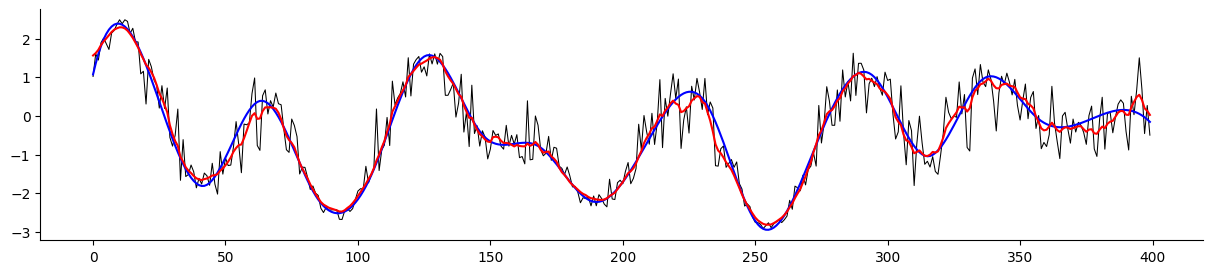

In [1046]:
relaxed_tikhonov_sphere.plot_hyper1(noise_smooth_signal, data_smooth_signal, sol_x)

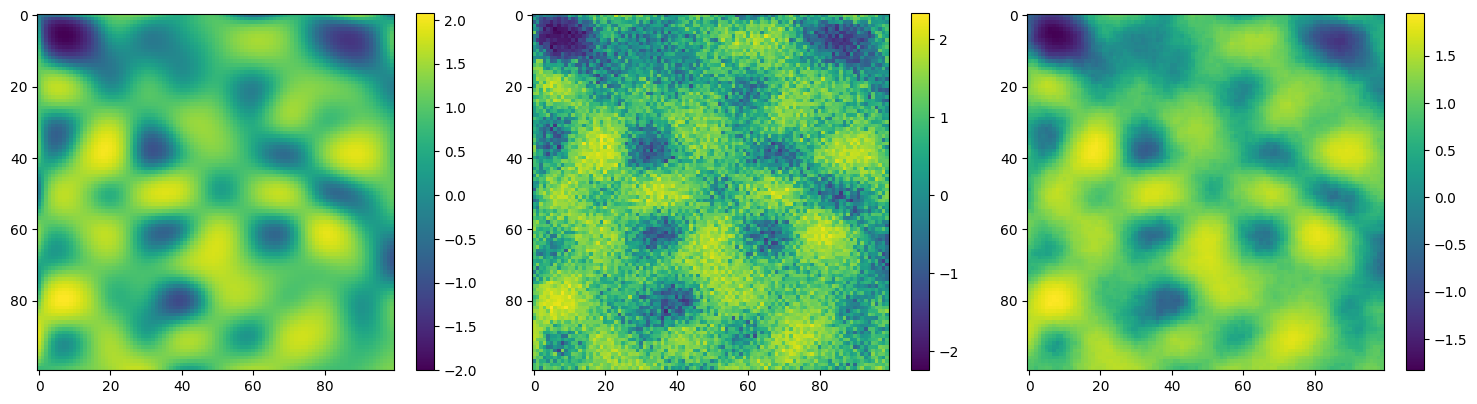

In [1049]:
relaxed_tikhonov_sphere_image.plot_hyper1(noise_smooth_image,data_smooth_image,sol_x)

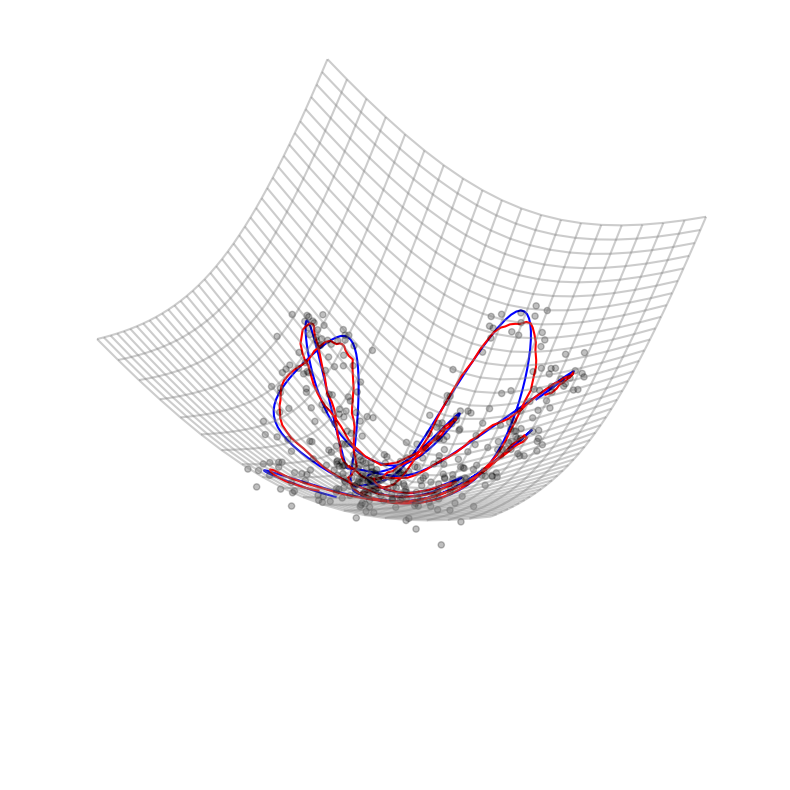

In [1034]:
relaxed_tikhonov_sphere.plot_hyper2(noise_smooth_signal,data_smooth_signal,sol_x)

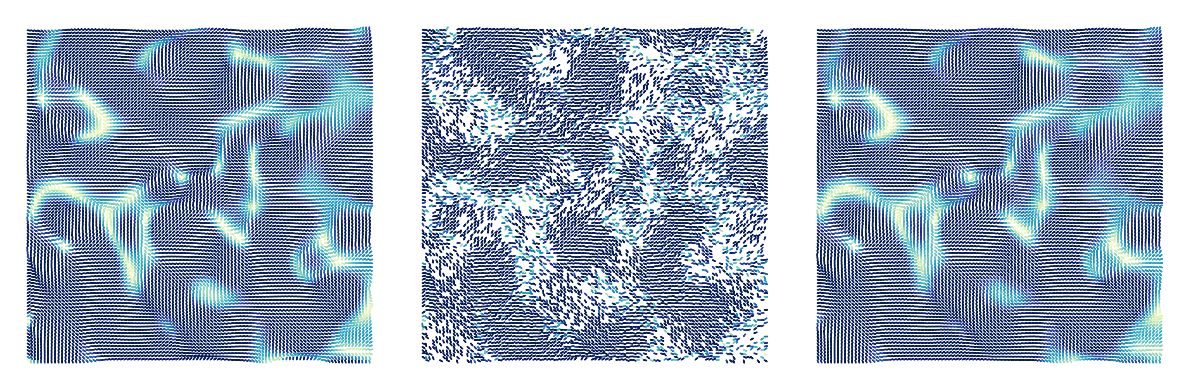

In [1020]:
relaxed_tikhonov_sphere_image.plot_hyper2(noise_smooth_image, data_smooth_image, sol_x)